الإحصائيات الوصفية:
          new_cases   new_deaths
count   1674.000000  1674.000000
mean     502.669654     5.762246
std     2726.671646    29.291937
min        0.000000     0.000000
25%        0.000000     0.000000
50%        0.000000     0.000000
75%        0.000000     0.000000
max    37866.000000   347.000000


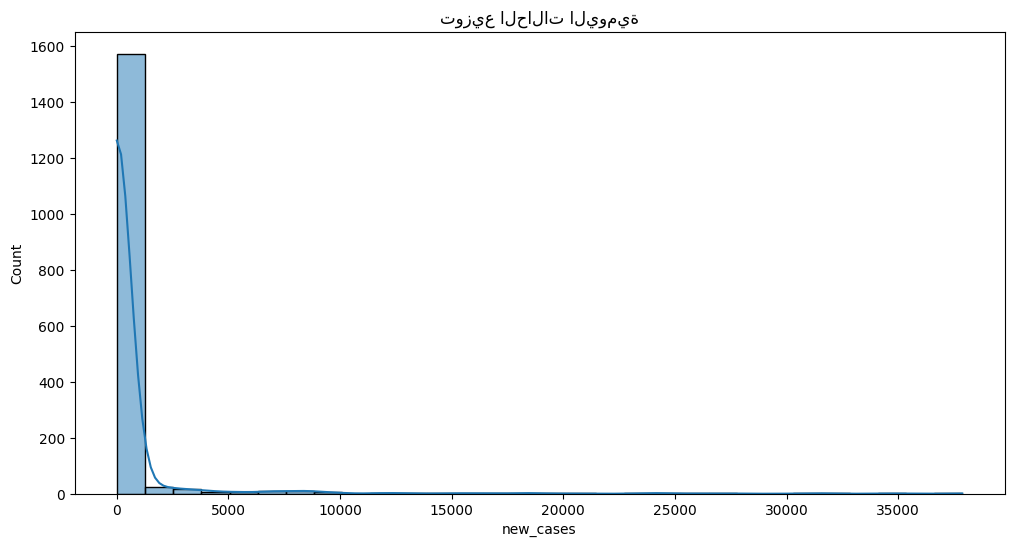

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# تحميل البيانات المنظفة
data = pd.read_csv('../data/processed/saudi_covid_processed.csv')

# 1. الإحصائيات الأساسية
print("الإحصائيات الوصفية:")
print(data[['new_cases', 'new_deaths']].describe())

# 2. توزيع الحالات اليومية
plt.figure(figsize=(12, 6))
sns.histplot(data['new_cases'], bins=30, kde=True)
plt.title("توزيع الحالات اليومية")
plt.savefig('../outputs/plots/cases_distribution.png')

# العثور على أعلى 5 أيام من حيث الحالات

أيام الذروة:
            date  new_cases
749  2022-01-23    37866.0
742  2022-01-16    34660.0
756  2022-01-30    31565.0
168  2020-06-21    30925.0
182  2020-07-05    27425.0


<Axes: xlabel='date', ylabel='new_cases'>

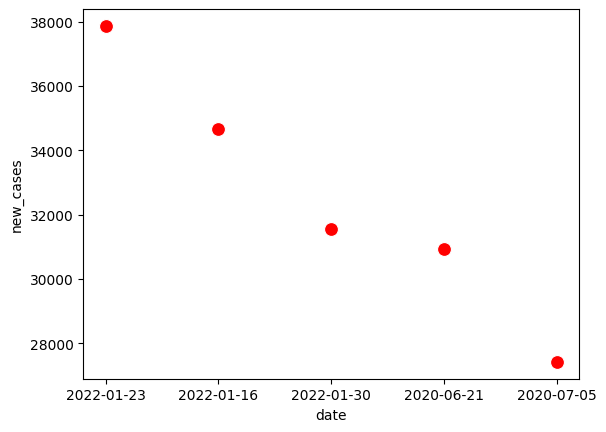

In [ ]:

top_cases = data.nlargest(5, 'new_cases')[['date', 'new_cases']]
print("أيام الذروة:\n", top_cases)

sns.scatterplot(data=top_cases, x='date', y='new_cases', color='red', s=100)

C:\Users\gknow\AppData\Local\Temp\ipykernel_33036\326305236.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='month', y='new_cases', palette='coolwarm')
C:\Users\gknow\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


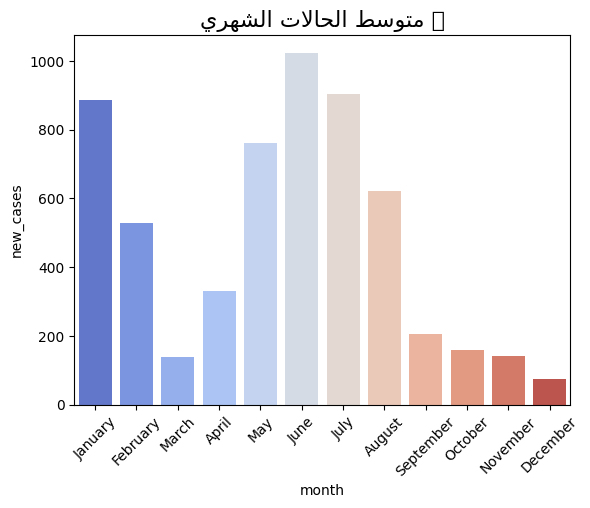

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

df = pd.read_csv(r'C:\Users\gknow\Desktop\covid19_Analais\data\processed\saudi_covid_processed.csv')

df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.month_name()

monthly_avg = df.groupby('month')['new_cases'].mean().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg['month'] = pd.Categorical(monthly_avg['month'], categories=month_order, ordered=True)
monthly_avg = monthly_avg.sort_values('month')

title_text = "🌦️ متوسط الحالات الشهرية"
reshaped_text = arabic_reshaper.reshape(title_text)
bidi_text = get_display(reshaped_text)

sns.barplot(data=monthly_avg, x='month', y='new_cases', palette='coolwarm')
plt.title(bidi_text, fontsize=16)
plt.xticks(rotation=45)
plt.show() 

5. تحليل النمط الأسبوعي


C:\Users\gknow\AppData\Local\Temp\ipykernel_33036\3684159033.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day_of_week', y='new_cases', order=day_order, palette='Pastel1')
C:\Users\gknow\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


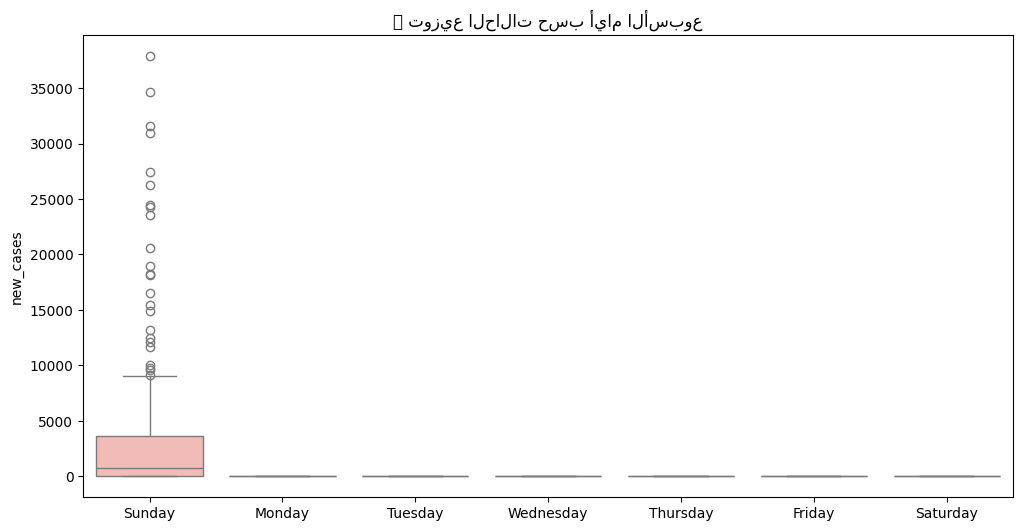

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

df['day_of_week'] = df['date'].dt.day_name()
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='day_of_week', y='new_cases', order=day_order, palette='Pastel1')
plt.title("📅 توزيع الحالات حسب أيام الأسبوع")
plt.xlabel("")
plt.show()